In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from tensorflow import keras
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Pave_\AppData\Local\Temp\ipykernel_17368\2336792942.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization


In [2]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина экшена
max_action_len = 50
#Число классов
num_classes = 15

# Загрузка тренировочных данных

In [3]:
train = pd.read_csv('actionsNPCDataSet/trainActions.csv',header=None,
names=['class', 'text'])

In [4]:
#Получение экшенов
actions = train['text']

In [5]:
y_train = utils.to_categorical(train['class'] - 1, num_classes)

# Токенизация

In [6]:
tokenizer = Tokenizer(num_words=num_words)

In [7]:
#Обучение токенайзера
tokenizer.fit_on_texts(actions)

In [8]:
train_sequences = tokenizer.texts_to_sequences(actions)

In [9]:
x_train = pad_sequences(train_sequences, maxlen=max_action_len)

# Загрузка тестовых данных

In [10]:
test = pd.read_csv('actionsNPCDataSet/actionsTest.csv', header=None,
                   names=['class', 'text'])

In [11]:
#Получение экшенов
test_actions = test['text']

In [12]:
y_test = utils.to_categorical(test['class'] - 1, num_classes)

# Токенизация

In [13]:
test_sequences = tokenizer.texts_to_sequences(test_actions)

In [14]:
x_test = pad_sequences(test_sequences, maxlen=max_action_len)

# Модель

In [21]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_action_len,
                    embeddings_regularizer=keras.regularizers.l2(0.0001)))
model.add(Dense(units=288, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 dense_2 (Dense)             (None, 50, 288)           29088     
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_3 (Dense)             (None, 15)                216015    
                                                                 
Total params: 1,245,103
Trainable params: 1,245,103
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_model = model.fit(x_train,
                          y_train,
                          epochs=5,
                          batch_size=128,
                          validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 4s 56ms/step - loss: 2.4226 - accuracy: 0.3482 - val_loss: 1.7370 - val_accuracy: 0.5379
Epoch 2/5
45/45 [==============================] - 2s 41ms/step - loss: 0.9466 - accuracy: 0.8014 - val_loss: 0.4623 - val_accuracy: 0.9015
Epoch 3/5
45/45 [==============================] - 2s 45ms/step - loss: 0.2434 - accuracy: 0.9668 - val_loss: 0.2266 - val_accuracy: 0.9631
Epoch 4/5
45/45 [==============================] - 2s 46ms/step - loss: 0.1181 - accuracy: 0.9940 - val_loss: 0.1766 - val_accuracy: 0.9731
Epoch 5/5
45/45 [==============================] - 2s 44ms/step - loss: 0.0875 - accuracy: 0.9986 - val_loss: 0.1580 - val_accuracy: 0.9759


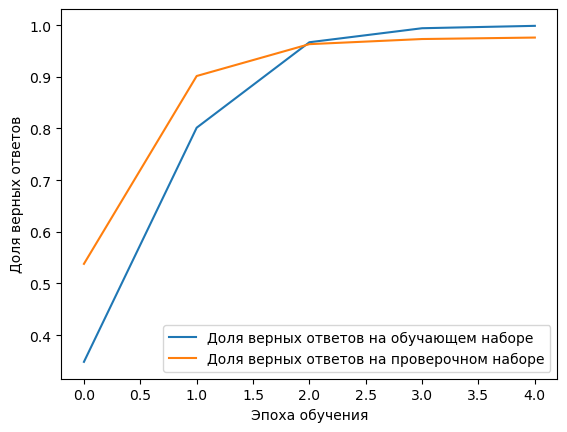

In [23]:
plt.plot(history_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [24]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 2s 36ms/step - loss: 0.1743 - accuracy: 0.9764
1400
1400
